In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def color_by_f_value(f, all_prob_dicts, m0 = None, m0s = None, all_m0s = False, cmap = "viridis"):
  f_vals = []
  for prob in all_prob_dicts:
    f_vals = f_vals + selective_m0(f, prob, m0 = m0, m0s = m0s, all_m0s = all_m0s)
  max_val = max(f_vals)
  min_val = min(f_vals)
  return [cm.get_cmap('viridis')((f_val - min_val)/(max_val - min_val)) for f_val in f_vals]

In [14]:
def subdivide_lst(data_lst, f, rtol = 0.01):
  group_dict = {}
  for data_dict in data_lst:
    for m0 in data_dict["m0s"]:
      val = f(data_dict, m0)
      stored = False
      keys = ["h", "d", "a", "region", m0]
      out_dict = {key: data_dict[key] for key in keys}
      out_dict["m0s"] = [m0]
      for key in group_dict.keys():
        if abs((val - key)/key) < rtol:
          group_dict[key].append(out_dict)
          stored = True
          break
      if not stored:
        group_dict[val] = [out_dict]
  return [group_dict[key] for key in group_dict.keys()] # turn dict into lst of lsts

def subdivide_by_constants(data, xlab, variable_funcs):
  other_funcs = variable_funcs.copy()
  del other_funcs[xlab]
  subdivision = [data]
  for key in other_funcs.keys():
    subdivision = [entry for sublist in subdivision for entry in subdivide_lst(sublist, other_funcs[key])]
  return subdivision

In [ ]:
file1 = "data/predetermined-1.pkl"
all_data = open_pkl_file(file1)
for key in all_data.keys():
  generate_convergence_data(all_data[key], [0.01, 0.005])
  generate_log_data(all_data[key])
print(all_data.keys())
# all_prob_dicts = [data_dict for data_dict in all_data[key] for key in all_data.keys()]

dict_keys(['m0h', '(h-d)/radwidth', 'left ratio', 'right ratio', 'rad ratio'])


In [15]:
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def right_ratio(data_dict):
  region = data_dict["region"]
  if region == (len(data_dict["d"]) - 1):
     return data_dict["h"]/(data_dict["h"] - data_dict["d"][region])
  else:
    return (data_dict["h"] - data_dict["d"][region + 1])/(data_dict["h"] - data_dict["d"][region])
    
def left_ratio(data_dict):
  region = data_dict["region"]
  if region == 0:
     return 0
  else:
    return (data_dict["h"] - data_dict["d"][region - 1])/(data_dict["h"] - data_dict["d"][region])
  
def rad_ratio(data_dict):
  region = data_dict["region"]
  radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
  return radwidth/data_dict["a"][region]

def m0h(data_dict, m0):
  return data_dict["h"] * m0

variable_funcs = {"(h-d1)/(h-d2)" : wrap_m0(left_ratio),
                  "h/(h-d2)" : wrap_m0(right_ratio),
                  "(h-d2)/radwidth" : wrap_m0(h_minus_d_over_radwidth),
                  "radwidth/a2" : wrap_m0(rad_ratio),
                  "m0h" : m0h}

[np.float64(16.0), np.float64(17.00000000000006), np.float64(17.99999999999995), np.float64(18.99999999999997), np.float64(20.0), np.float64(21.000000000000075), np.float64(22.000000000000064), np.float64(23.00000000000018), np.float64(24.000000000000135), np.float64(25.00000000000009)]


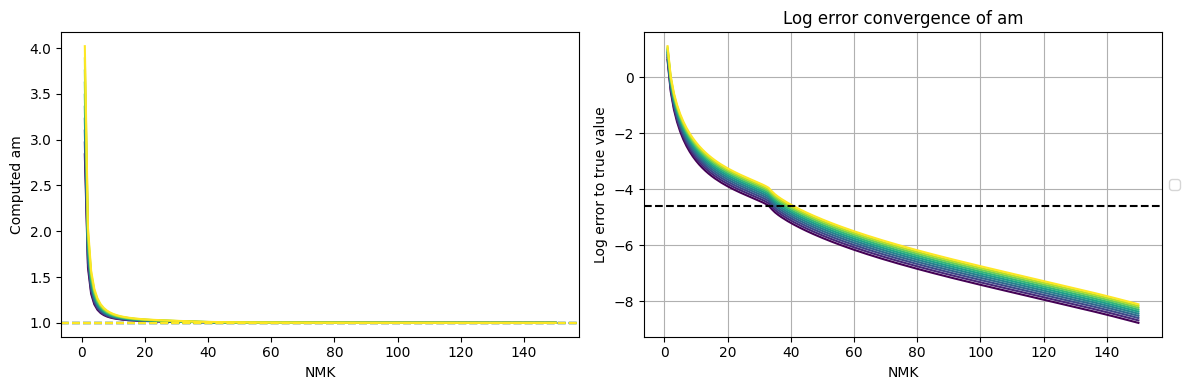

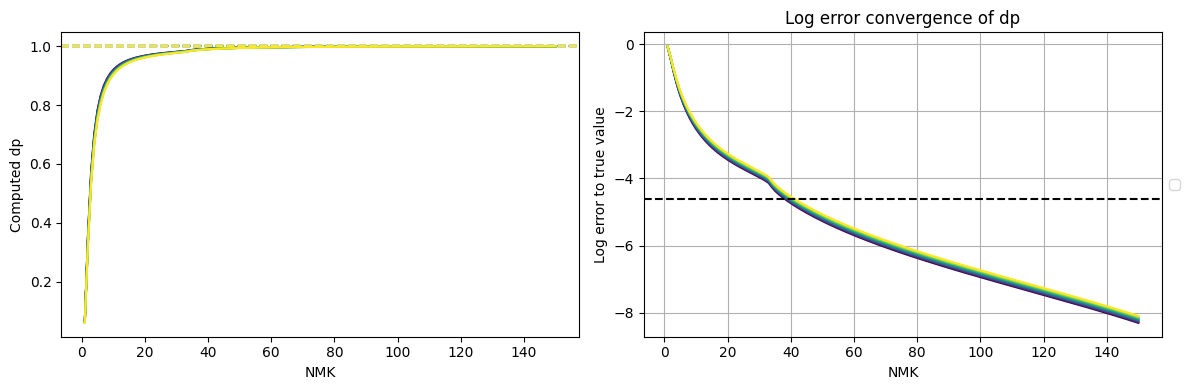

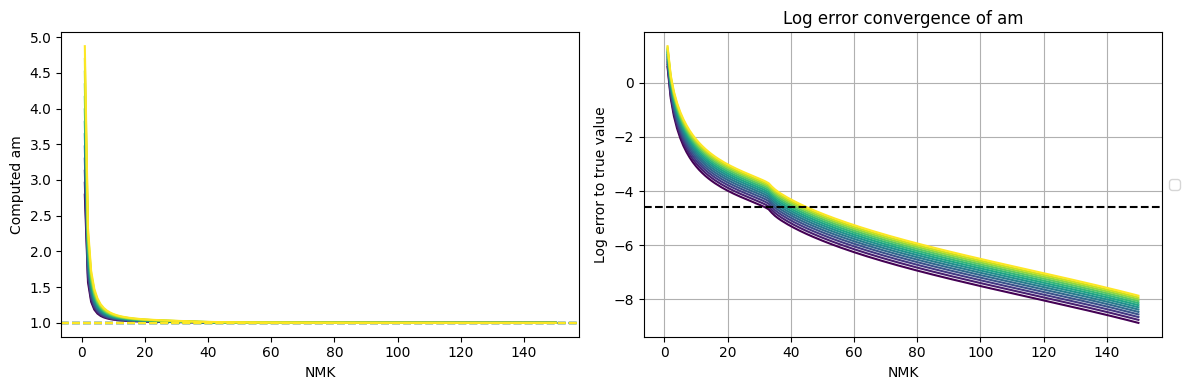

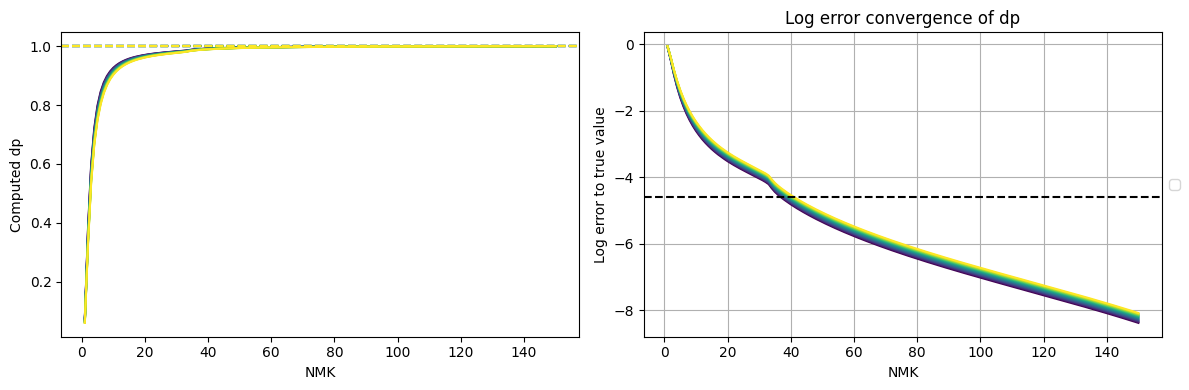

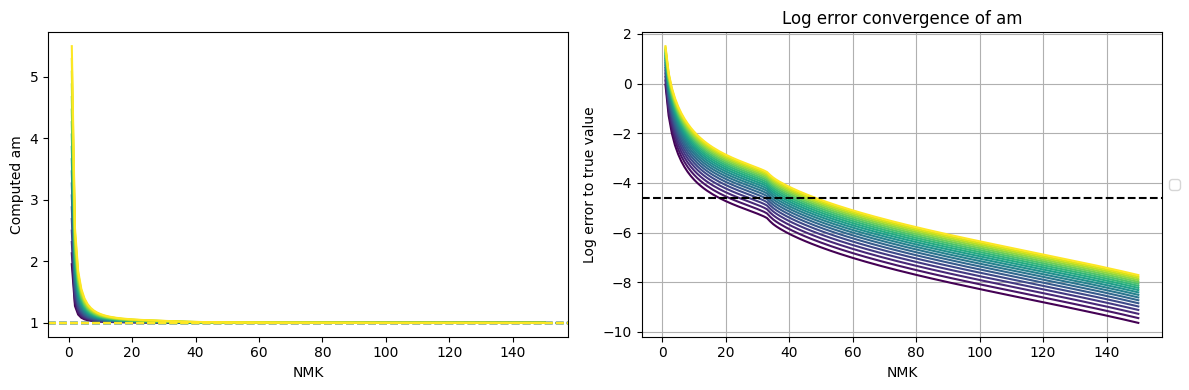

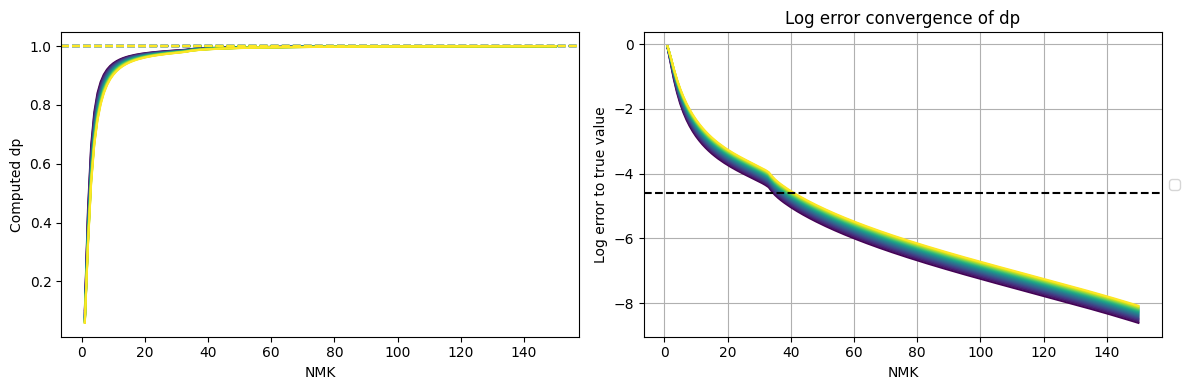

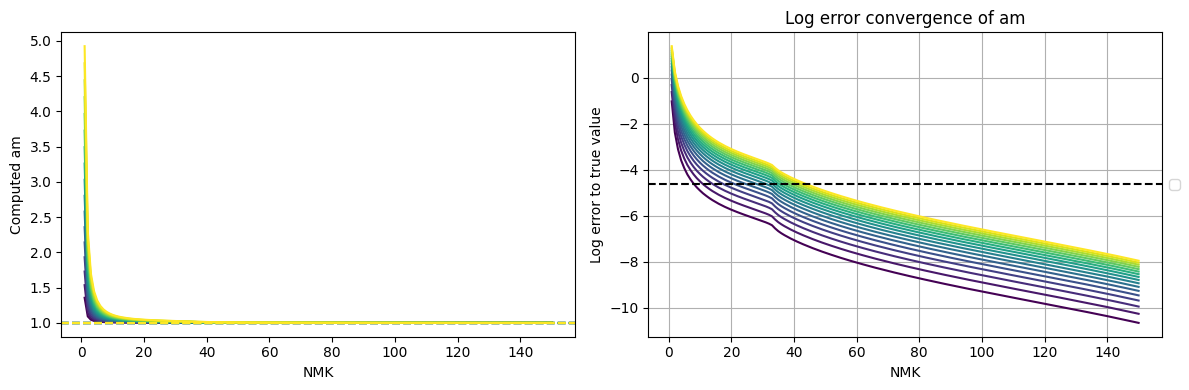

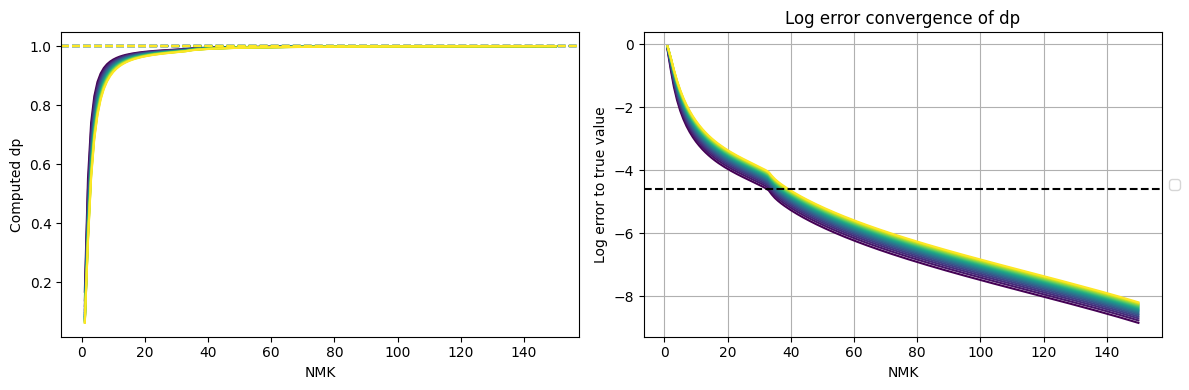

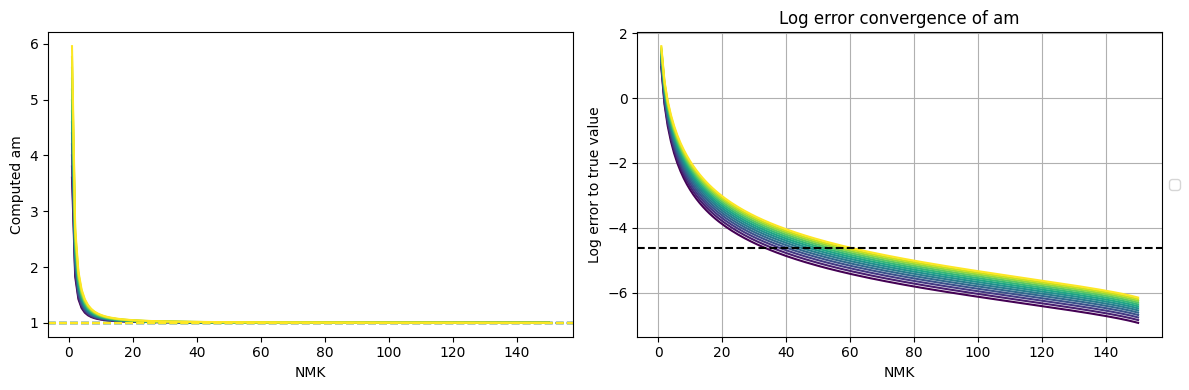

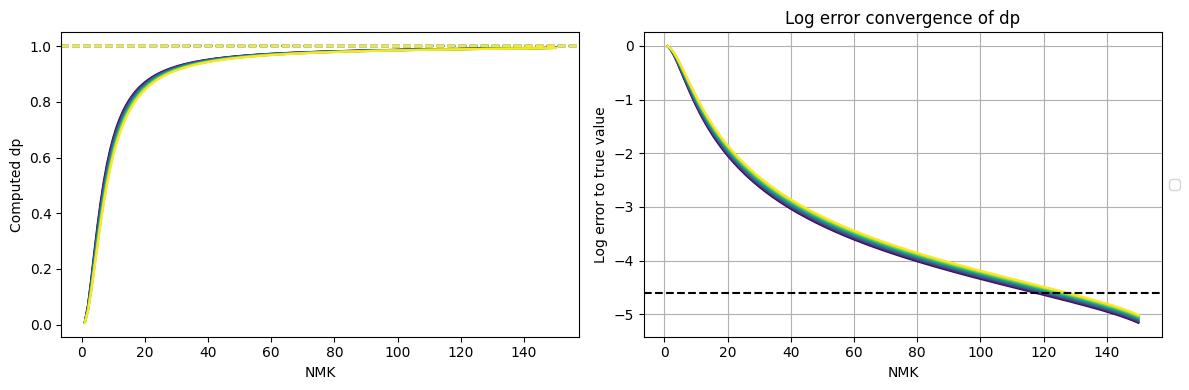

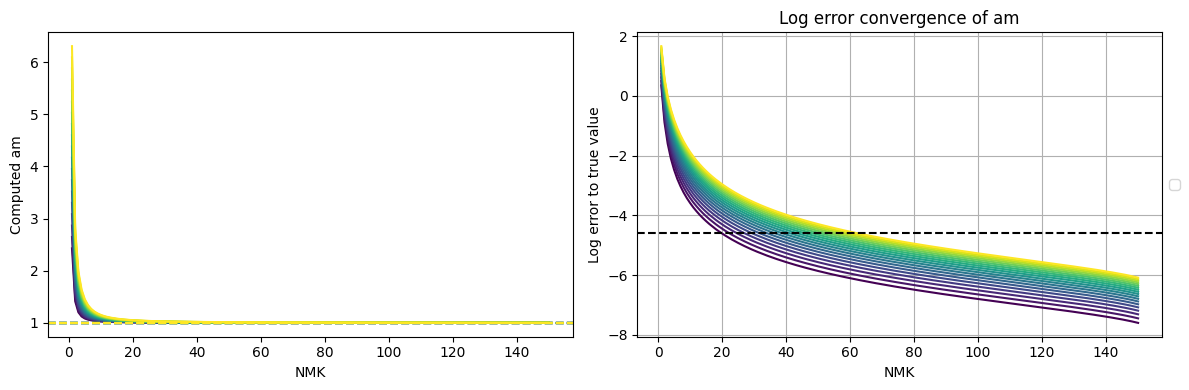

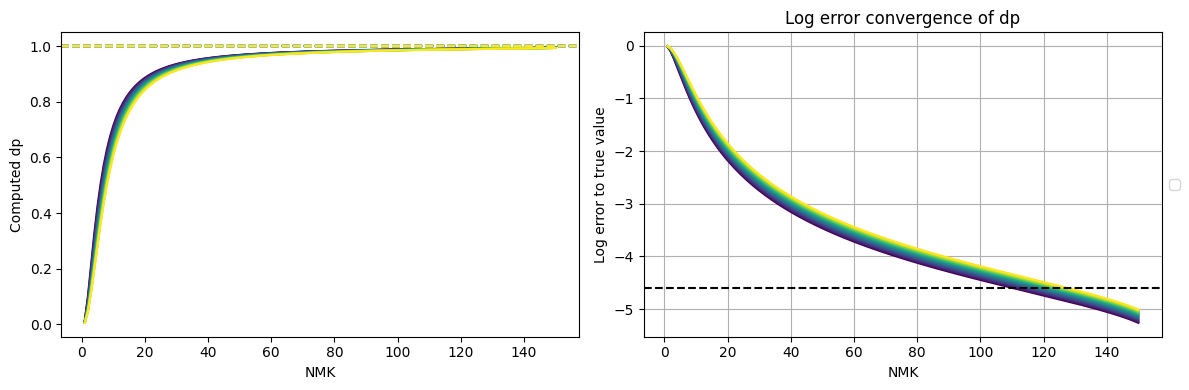

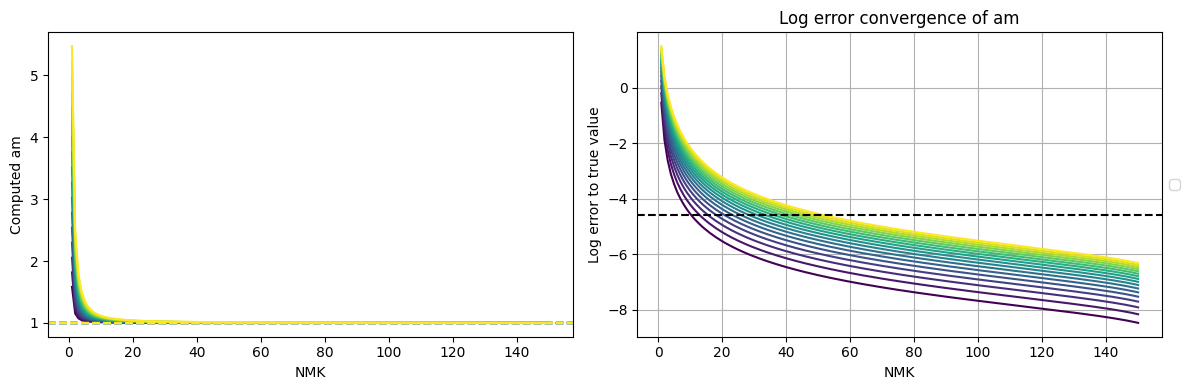

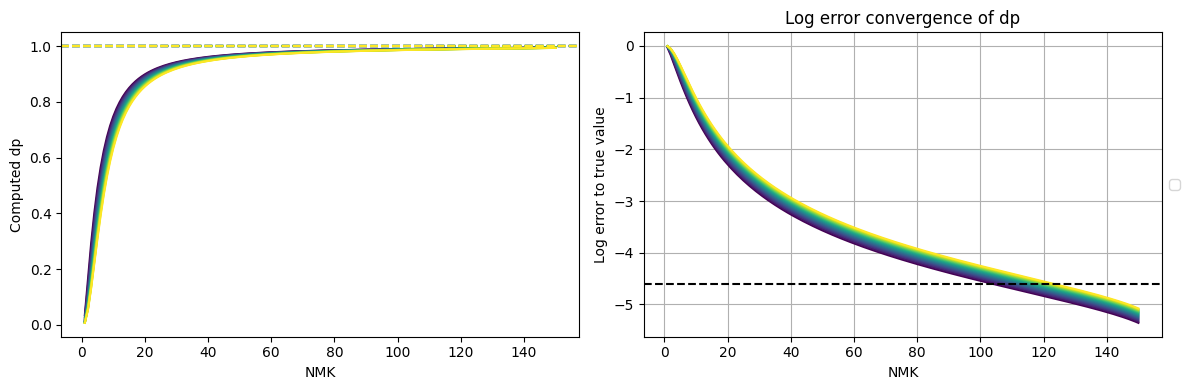

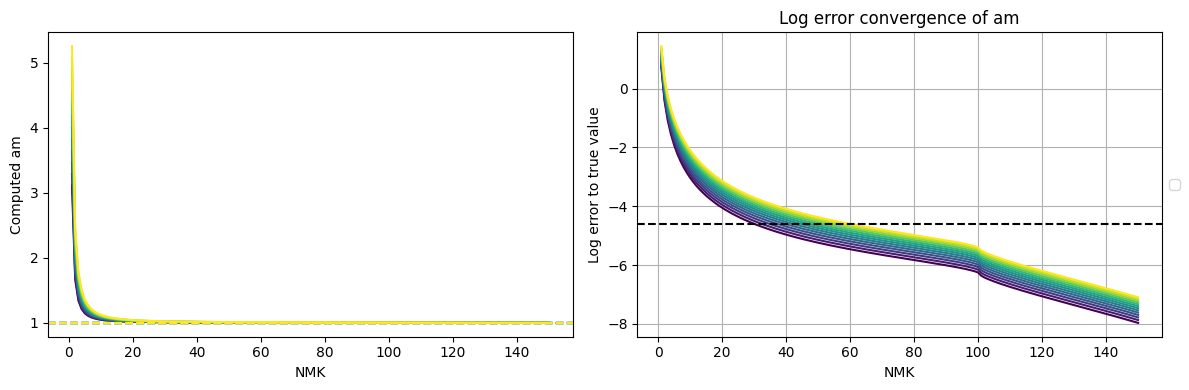

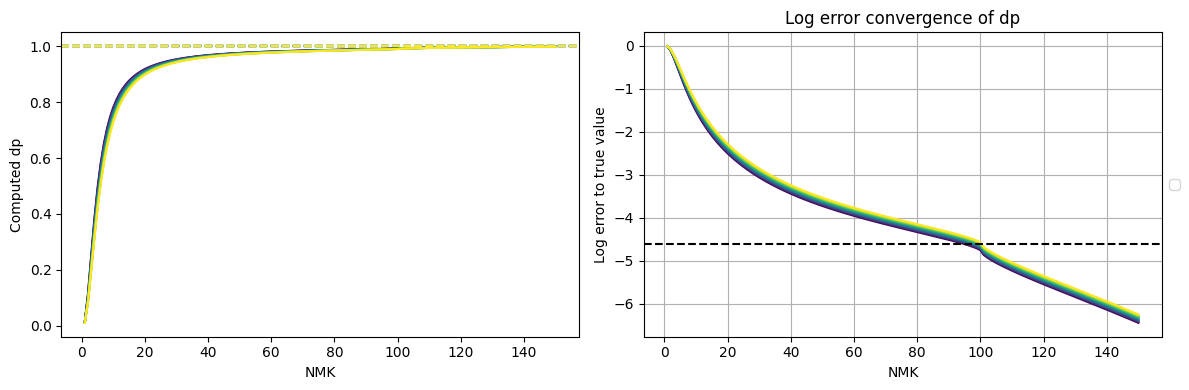

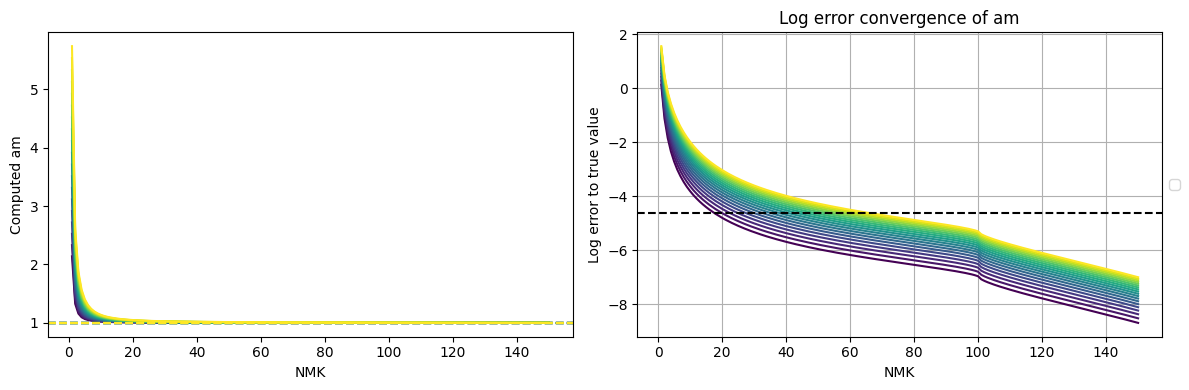

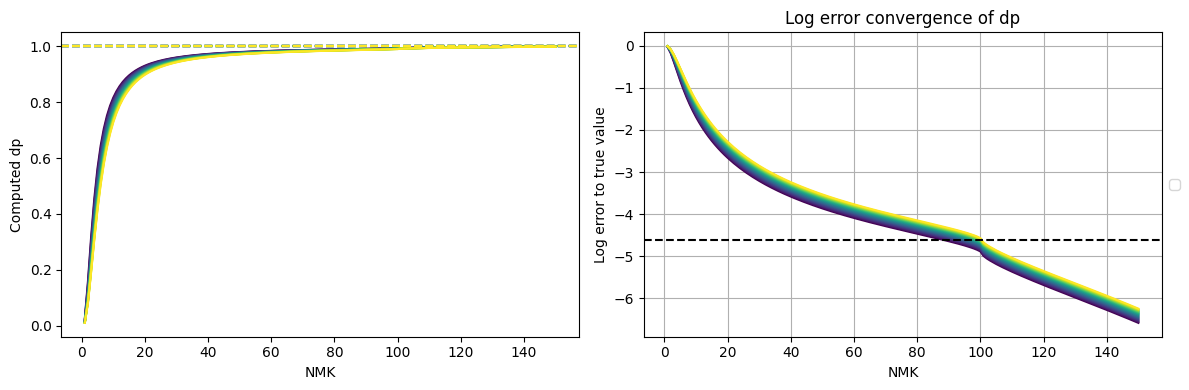

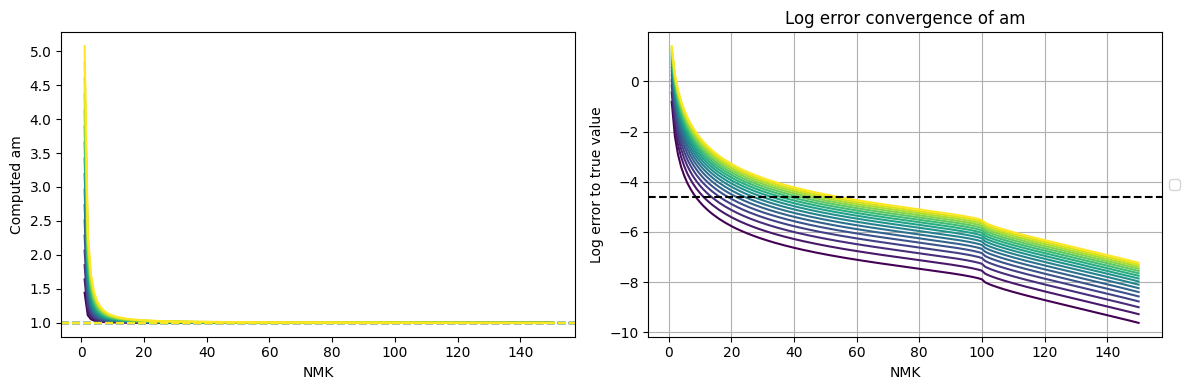

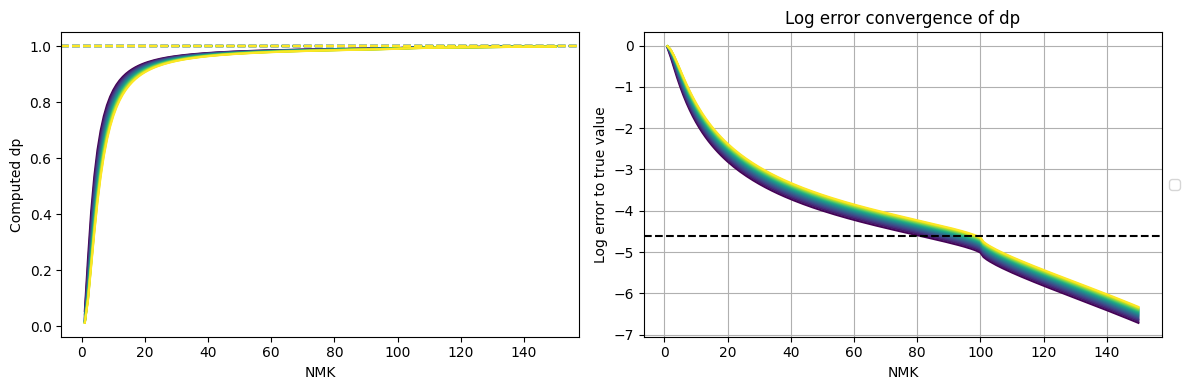

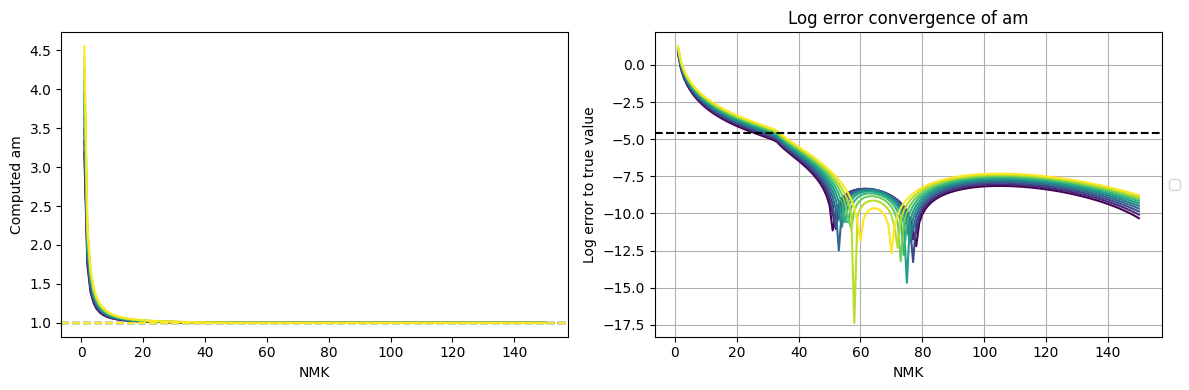

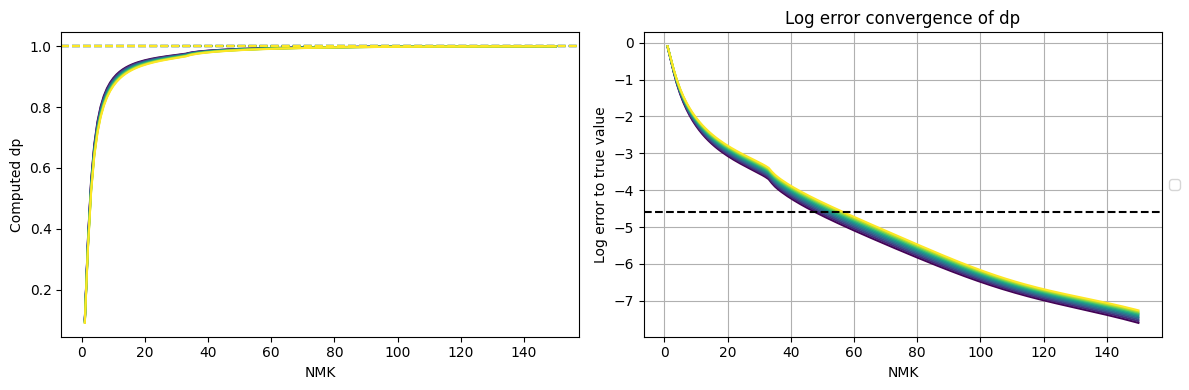

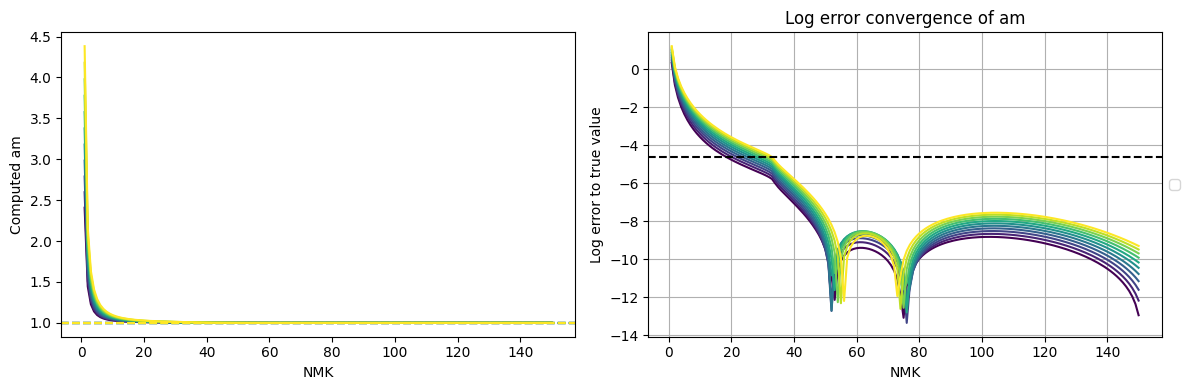

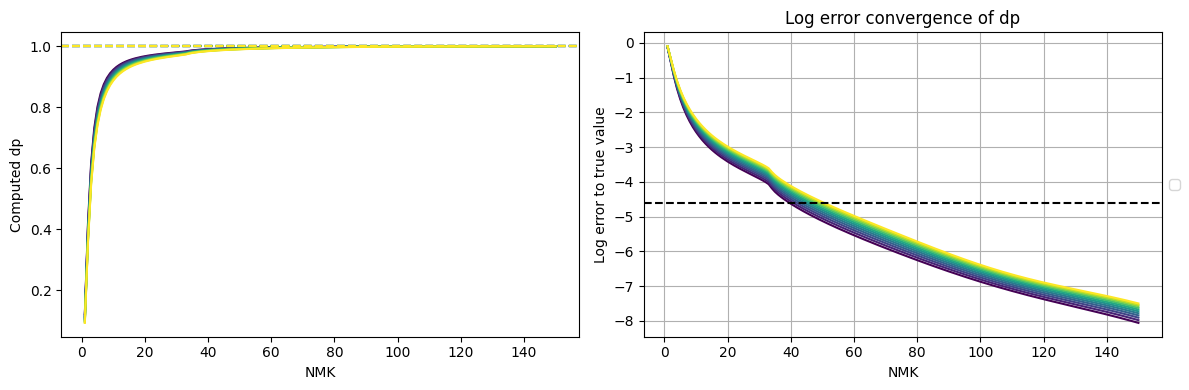

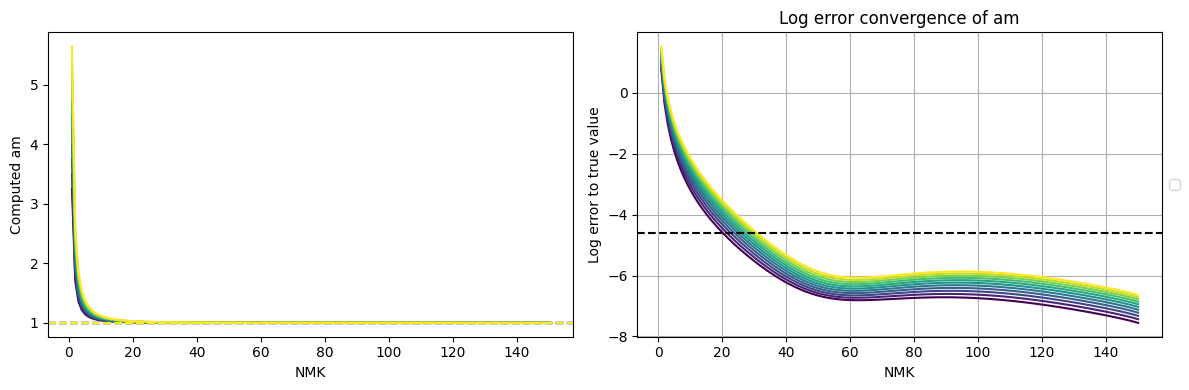

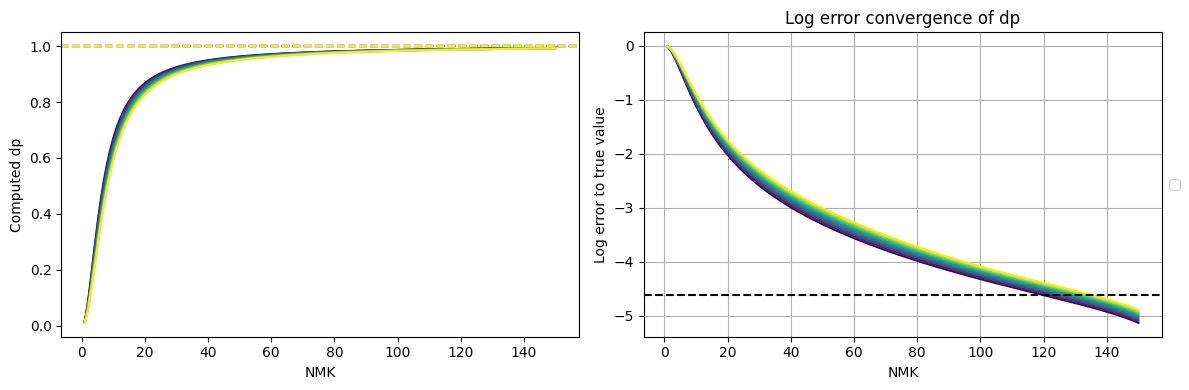

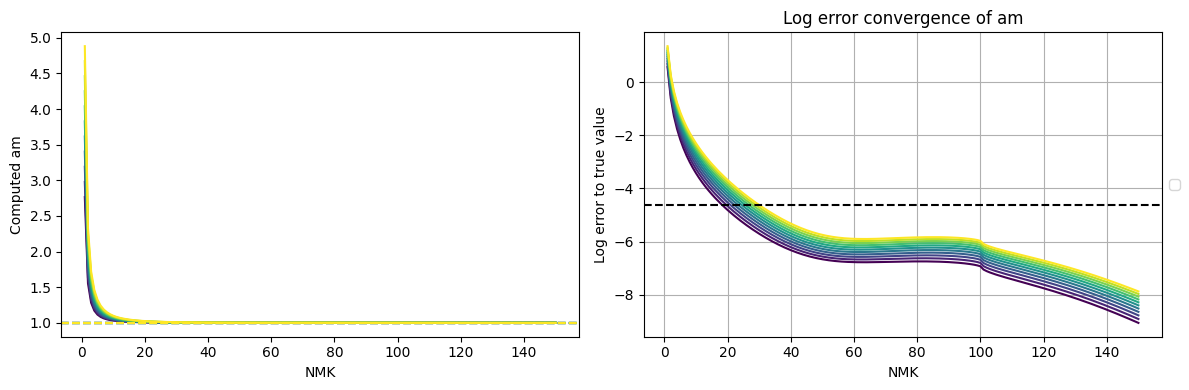

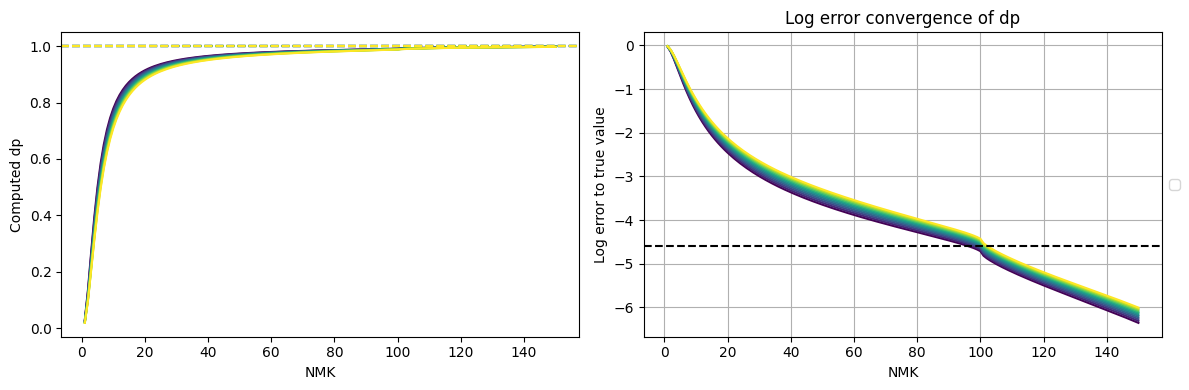

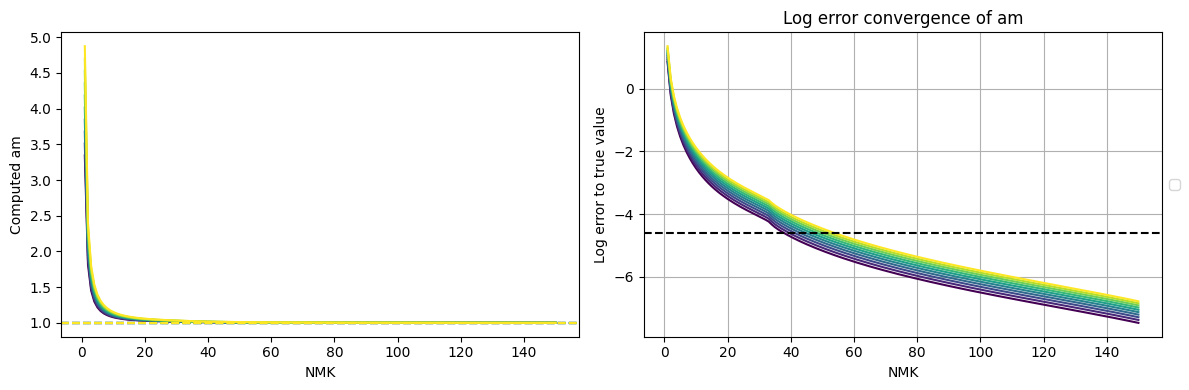

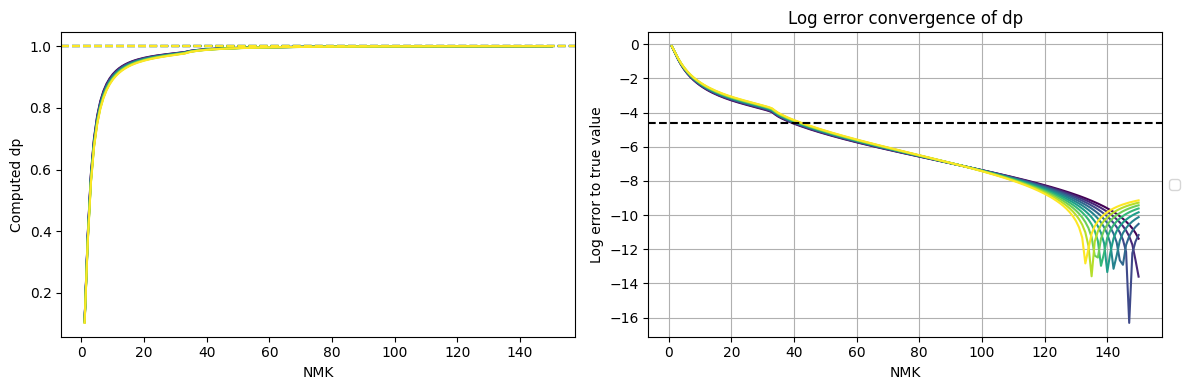

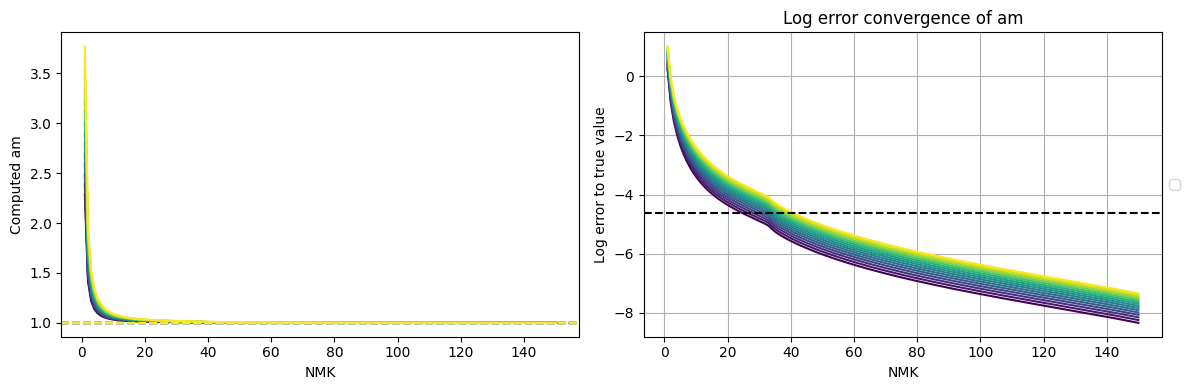

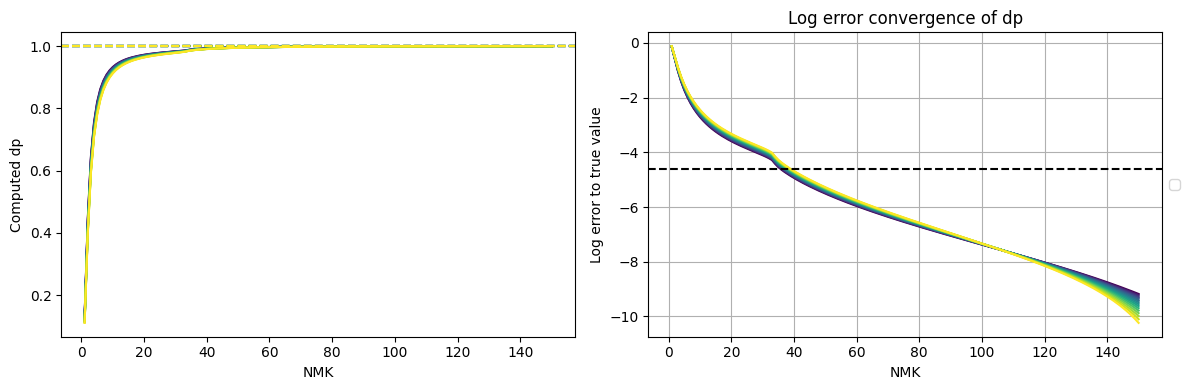

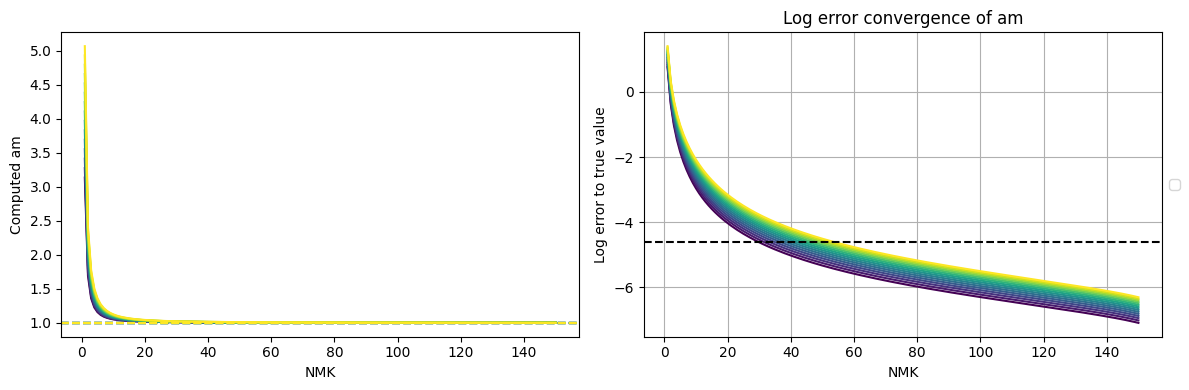

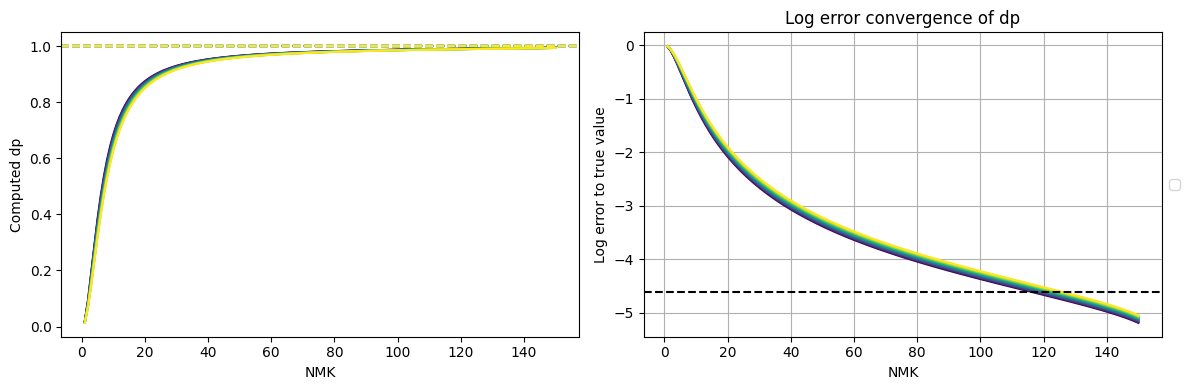

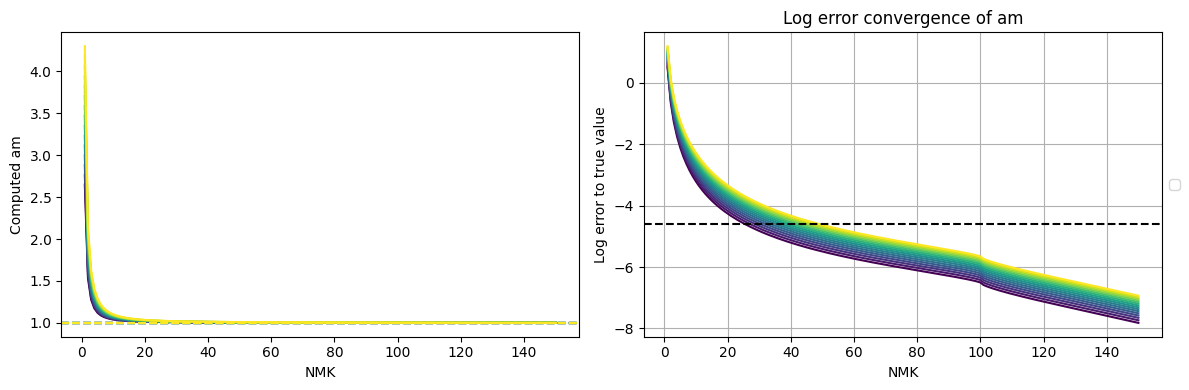

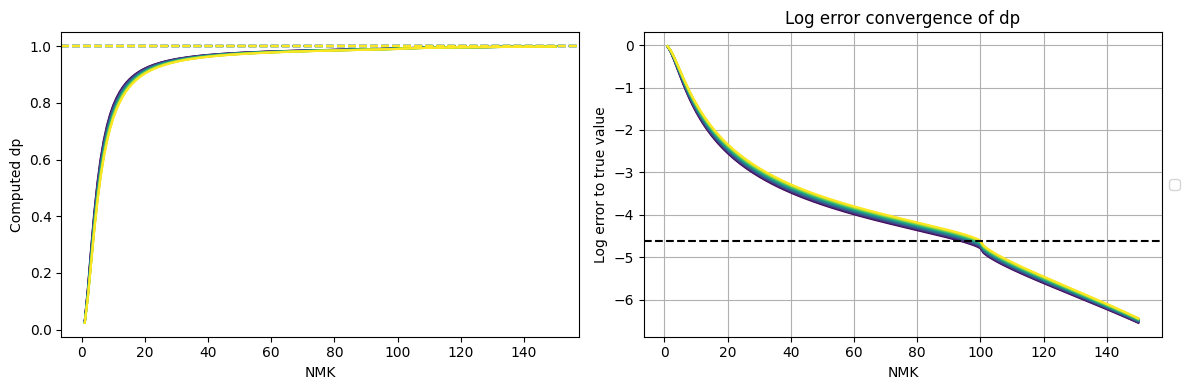

In [24]:
restricted = subdivide_by_constants(all_data["(h-d)/radwidth"], "(h-d2)/radwidth", variable_funcs)

print([h_minus_d_over_radwidth(entry) for entry in restricted[0]])
for subset in restricted:
  data = many_data_dicts_to_convergence_plot_data(subset)
  colors = color_by_f_value(wrap_m0(h_minus_d_over_radwidth), subset)
  plot_set_convergence_and_log(data, "am", scale = True, show_error=True, colors = colors)
  plot_set_convergence_and_log(data, "dp", scale = True, show_error=True, colors = colors)

In [ ]:
h, d, a, m0, heaving, rho = 
prob = ConvergenceProblemI()